# AI Workflow Capstone - Part 1

This notebook is for the part 1 exploratory data analysis of the AI Workflow Capstone course.

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# training data files
sorted(os.listdir(os.path.join("..", "data", "cs-train")))

['invoices-2017-11.json',
 'invoices-2017-12.json',
 'invoices-2018-01.json',
 'invoices-2018-02.json',
 'invoices-2018-03.json',
 'invoices-2018-04.json',
 'invoices-2018-05.json',
 'invoices-2018-06.json',
 'invoices-2018-07.json',
 'invoices-2018-08.json',
 'invoices-2018-09.json',
 'invoices-2018-10.json',
 'invoices-2018-11.json',
 'invoices-2018-12.json',
 'invoices-2019-01.json',
 'invoices-2019-02.json',
 'invoices-2019-03.json',
 'invoices-2019-04.json',
 'invoices-2019-05.json',
 'invoices-2019-06.json',
 'invoices-2019-07.json']

In [3]:
# create empty dataframe to add training data to
df = pd.DataFrame()

In [4]:
# correct list of column names
correct_cols = sorted(['country', 'customer_id', 'invoice', 'price', 'stream_id', 
                'times_viewed', 'year', 'month', 'day'])

In [5]:
datafiles = sorted(os.listdir(os.path.join("..", "data", "cs-train")))

for file in datafiles:
    filename = os.path.join("..", "data", "cs-train", file)
    file_df = pd.read_json(filename,
                           dtype={'country': str, 'customer_id': str, 'invoice': str, 
                                  'price': str, 'stream_id': str, 'times_viewed': str, 
                                  'year': str, 'month': str, 'day': str})
    
    # correct inconsistent column names
    cols = file_df.columns.to_list()
    if "total_price" in cols:
        file_df.rename(columns={"total_price": "price"}, inplace=True)
    if "StreamID" in cols:
        file_df.rename(columns={"StreamID": "stream_id"}, inplace=True)
    if "TimesViewed" in cols:
        file_df.rename(columns={"TimesViewed": "times_viewed"}, inplace=True)
    if sorted(file_df.columns.to_list()) != correct_cols:
        print("column names do not match")
    
    df = df.append(file_df)

In [6]:
# perform clean up and convert data types

# remove alpha characters from invoice column
df["invoice"] = df["invoice"].str.replace(r"[a-zA-Z]", "")
# convert columns customer_id, invoice, price, times_viewed, year, month, day to numeric
df[["customer_id", "invoice", "price", "times_viewed", "year", 
    "month", "day"]] = df[["customer_id", "invoice", "price", 
                           "times_viewed", "year", "month", 
                           "day"]].apply(pd.to_numeric, errors="coerce")

## Data Investigation

Now that we have a dataframe with all of our data, we will review the data for reasonableness and check for outliers.

In [7]:
# review resulting dataframe stats
df.describe(include="all")

,country,customer_id,invoice,price,stream_id,times_viewed,year,month,day
count,815011,625249.000000,815011.000000,815011.000000,815011,815011.000000,815011.000000,815011.000000,815011.000000
unique,43,NaN,NaN,NaN,5007,NaN,NaN,NaN,NaN
top,United Kingdom,NaN,NaN,NaN,85123A,NaN,NaN,NaN,NaN
freq,751228,NaN,NaN,NaN,5017,NaN,NaN,NaN,NaN
mean,NaN,15333.415068,526773.221948,4.802631,NaN,5.231106,2018.247654,6.592718,15.064819
std,NaN,1698.360788,20734.819988,135.058707,NaN,5.109982,0.545261,3.598781,8.788845
min,NaN,12346.000000,489434.000000,-53594.360000,NaN,0.000000,2017.000000,1.000000,1.000000
25%,NaN,13956.000000,509031.000000,1.250000,NaN,1.000000,2018.000000,3.000000,7.000000
50%,NaN,15279.000000,528383.000000,2.100000,NaN,3.000000,2018.000000,6.000000,15.000000
75%,NaN,16813.000000,543527.000000,4.210000,NaN,8.000000,2019.000000,10.000000,23.000000


NOTE: Some of the data in `price` seems incorrect.  There are negative values for price as well as extremely large values.

In [8]:
# review negative prices
df[df["price"] < 0]

,country,customer_id,invoice,price,stream_id,times_viewed,year,month,day
29648,United Kingdom,NaN,506401,-53594.36,B,1,2018,4,26
16895,United Kingdom,NaN,516228,-44031.79,B,1,2018,7,16
34579,United Kingdom,NaN,528059,-38925.87,B,1,2018,10,17


We will remove these negative values from training.

In [9]:
# review extremely large prices
df[df["price"] > 1000]

,country,customer_id,invoice,price,stream_id,times_viewed,year,month,day
7309,United Kingdom,15482.0,490129,1998.49,M,1,2017,11,30
14940,United Kingdom,13091.0,491176,1213.02,M,1,2017,12,7
9843,United Kingdom,NaN,494477,1747.62,M,3,2018,1,11
16389,United Kingdom,NaN,494918,1081.70,DOT,1,2018,1,16
21123,EIRE,14156.0,495234,1193.89,M,2,2018,1,19
...,...,...,...,...,...,...,...,...,...
21242,United Kingdom,NaN,560373,4287.63,M,1,2019,7,15
21243,United Kingdom,17448.0,560372,4287.63,M,3,2019,7,15
24838,United Kingdom,18102.0,560647,3060.60,M,3,2019,7,17
40163,United Kingdom,NaN,562086,6721.37,AMAZONFEE,3,2019,7,30


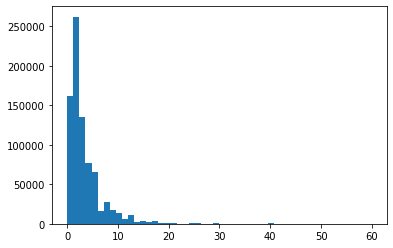

In [10]:
plt.hist(df.loc[(df["price"] >= 0) & (df["price"] < 60), "price"], bins = 50)
plt.show()

While the vast majority of prices are less than 10, there are some very high prices.  Rather than just a couple outliers, as we saw with the negative prices, this appears to be a very long tail.

In [11]:
# remove the negative values from price
df = df[df["price"] >= 0]

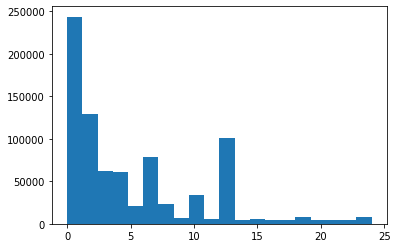

In [12]:
plt.hist(df["times_viewed"], bins=20)
plt.show()

Most of this data is clustered to the left, with low numbers of `times_viewed`, though there are some larger values.

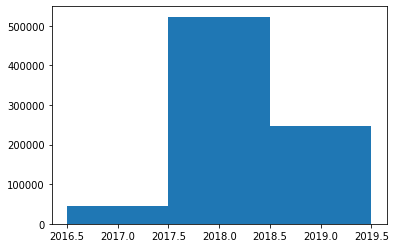

In [13]:
plt.hist(df["year"], bins=[2016.5, 2017.5, 2018.5, 2019.5])
plt.show()

This distribution makes sense, as we have only two months of data for 2017, a full year for 2018, and seven months for 2019.

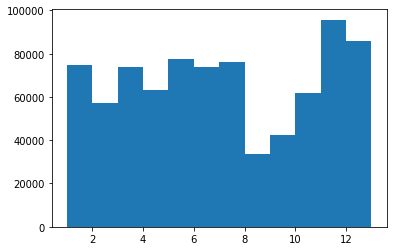

In [14]:
plt.hist(df["month"], bins=range(1,14))
plt.show()

Again, this makes sense, as we have two years of data for all but months 8, 9, and 10, so we would expect those to have lower counts.

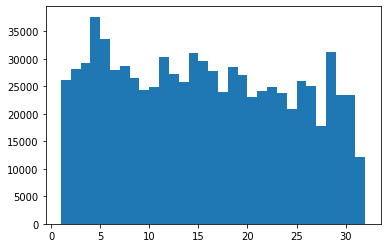

In [15]:
plt.hist(df["day"], bins=range(1,33))
plt.show()

This distribution is relatively even across day of the month, with a drop off for the 31st, which is expected given only about half the months included have 31 days.

In [16]:
# review countries with data
df["country"].value_counts()

United Kingdom          751225
EIRE                     13577
Germany                  13336
France                    9899
Netherlands               4024
Spain                     2606
Switzerland               2326
Belgium                   2166
Portugal                  1815
Australia                 1543
Channel Islands           1287
Sweden                    1156
Italy                     1049
Cyprus                     907
Norway                     796
Finland                    749
Austria                    719
Denmark                    629
Greece                     627
Unspecified                614
Japan                      514
United Arab Emirates       462
Poland                     429
Singapore                  310
Hong Kong                  276
USA                        266
Canada                     223
Malta                      219
Iceland                    195
Lithuania                  189
Israel                     139
Bahrain                    126
RSA     

In [17]:
countries = df["country"].value_counts()
countries[0:10]

United Kingdom    751225
EIRE               13577
Germany            13336
France              9899
Netherlands         4024
Spain               2606
Switzerland         2326
Belgium             2166
Portugal            1815
Australia           1543
Name: country, dtype: int64

<AxesSubplot:>

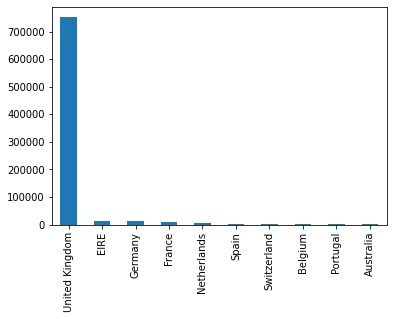

In [18]:
countries[0:10].plot.bar()

There are 43 unique countries included in this data, though we will only end up working with the top 10 countries.  Note that the United Kingdom dominates this data set, even when restricting to the top 10 countries.

## Feature Engineering

Next we will create a few features for future modeling work.

In [19]:
# create a datetime field with the date
df["date"] = pd.to_datetime(df["year"]*10000 + df["month"]*100 + df["day"], format='%Y%m%d')
df.head()

,country,customer_id,invoice,price,stream_id,times_viewed,year,month,day,date
0,United Kingdom,13085.0,489434,6.95,85048,12,2017,11,28,2017-11-28
1,United Kingdom,NaN,489597,8.65,22130,1,2017,11,28,2017-11-28
2,United Kingdom,NaN,489597,1.70,22132,6,2017,11,28,2017-11-28
3,United Kingdom,NaN,489597,1.70,22133,4,2017,11,28,2017-11-28
4,United Kingdom,NaN,489597,0.87,22134,1,2017,11,28,2017-11-28
